In [ ]:
#Наивный бейсовский классификатор

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from utilites import visualize_classifier

In [20]:
# Входной файл, содержащий данные
input_file = 'data_multivar_nb.txt'
# Загрузка данных из входного файла
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [21]:
# Создание наивного байесовского классификатора
classifier = GaussianNB()
# Тренировка классификатора
classifier.fit(X, y)
# Прогнозирование значений дпя тренировочных данных
y_pred = classifier.predict(X)

Accuracy of Naive Bayes classifier =  99.75 %


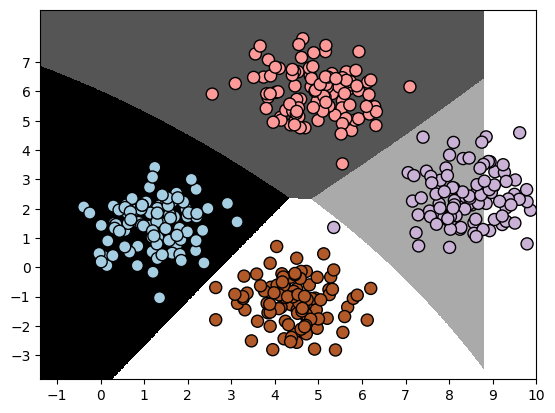

In [22]:
# Вычисление качества классификатора
accuracy = 100.0 * (y==y_pred).sum() / X.shape[0]
print('Accuracy of Naive Bayes classifier = ', round(accuracy, 2), "%")
# Визуализация результатов работы классификатора
visualize_classifier(classifier, X, y)

In [23]:
# Разбивка данных на обучающий и тестовый наборы 80% к тренировке а 20% к тестированию
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)


Accuracy of the new classifier = 100.0 %


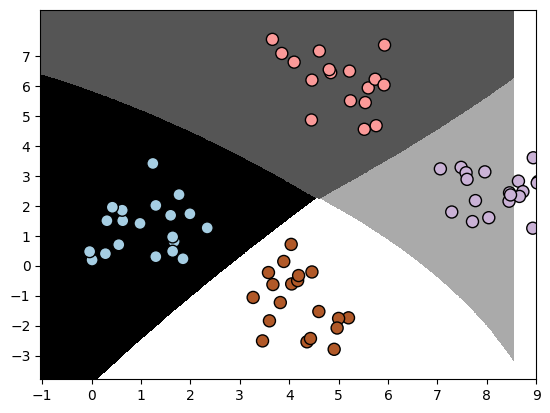

In [24]:
# Вычисление качества классификатора
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print('Accuracy of the new classifier =', round(accuracy, 2), "%")

# Визуализация работы классификатора
visualize_classifier(classifier_new, X_test, y_test)

In [25]:
num_folds = 3

#качество
accuracy_values = model_selection.cross_val_score(classifier, X, y, scoring='accuracy', cv = num_folds)
print("accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

#точность
precision_values = model_selection.cross_val_score(classifier, X, y, scoring='precision_weighted', cv = num_folds)
print("precision: " + str(round(100*precision_values.mean(), 2)) + "%")

#полнота
recall_values = model_selection.cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_folds)
print("recall: "+ str(round(100*recall_values.mean(), 2))+"%")

f1_values = model_selection.cross_val_score(classifier, X, y, scoring='f1_weighted', cv = num_folds)
print("f1: " + str(round(100*f1_values.mean(), 2)) + "%")

accuracy: 99.75%
precision: 99.76%
recall: 99.75%
f1: 99.75%


In [ ]:
# confusion matrix

In [26]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
# Определение выборочных меток
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

In [28]:
# Построение матрицы неточностей
confusion_mat = confusion_matrix(true_labels, pred_labels)

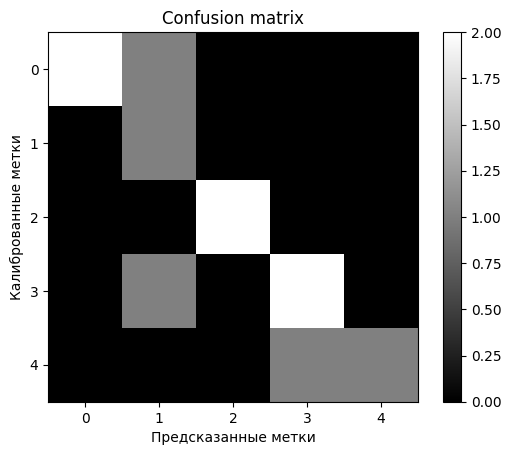

In [29]:
#visual confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('Калиброванные метки')
plt.xlabel('Предсказанные метки')
plt.show()

In [30]:
#otchet o rezultatah classificacii
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n', classification_report(true_labels, pred_labels, target_names=targets))




               precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [ ]:
# Support Vector Machine - SVM

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn import model_selection

In [96]:
input_file = 'adult.data'

In [97]:
# Read the data
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [98]:
# Convert to numpy array
X = np.array(X)

In [99]:
# Convert string data to numerical data
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [100]:
# Create SVM classifier
classifier = OneVsOneClassifier(LinearSVC(random_state=0))

In [101]:
# Train the classifier
classifier.fit(X, y)

/Users/adil/PycharmProjects/trash/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsOneClassifier(estimator=LinearSVC(random_state=0))

In [102]:

# Cross validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

/Users/adil/PycharmProjects/trash/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [103]:
# Compute the F1 score of the SVM classifier
f1 = model_selection.cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

/Users/adil/PycharmProjects/trash/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adil/PycharmProjects/trash/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score: 56.15%


/Users/adil/PycharmProjects/trash/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [104]:
# Predict output for a test datapoint
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']

In [105]:
# Encode test datapoint
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform(input_data[i]))
        count += 1

input_data_encoded = np.array(input_data_encoded)

ValueError: y should be a 1d array, got an array of shape () instead.

In [106]:
# Run classifier on encoded datapoint and print output
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])

ValueError: Expected 2D array, got 1D array instead:
array=[37 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#regression

In [124]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [125]:
# Input file containing data
input_file = 'data_singlevar_regr.txt'

In [126]:
# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [127]:
# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [128]:
# Training data
X_train, y_train = X[:num_training], y[:num_training]

In [129]:
# Test data
X_test, y_test = X[num_training:], y[num_training:]

In [130]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

In [131]:
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [132]:
# Predict the output
y_test_pred = regressor.predict(X_test)

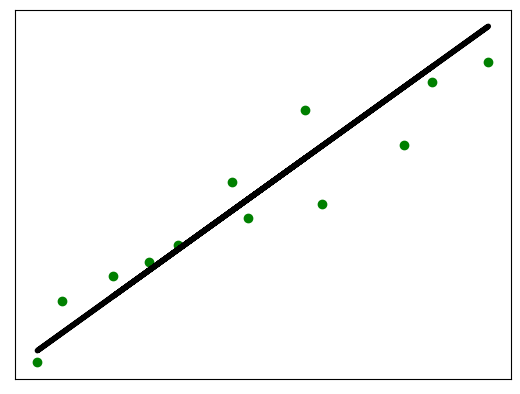

In [134]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [133]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [135]:
# Model persistence
output_model_file = 'model.pkl'

In [136]:
# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [137]:
# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [138]:
# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))


New mean absolute error = 0.59
